# Python Machine Learning 2
# Multiple Linear Regression
## *By Sal Lascano*

Fallowing the first notebook were we learned about Simple Linear regression. This notebook will be dedicated to learn about Multiple Linear Regression. 

Between Multiple and Simple, Multiple Linear Regression is the model that will be used the most by far. Since there is almost always more than only one independent variable affecting the dependent variable we will have to use Multiple Linear regression instead of Simple Linear regression. 

Lets Remember that Linear gregession is a mathematical model that allows us to assess wether one or multiple independent variables explain the dependent variable. 

Lets get to it!

If the dependent/output variable $Y$ depends on multiple independent/input variables, lets say $X_1, X_2, X_3, ...X_p$, we need to transform the Simple Linear Regression formula that we previously learned to the fallowing:
$$\hat{Y}=\hat{\beta}_0+\sum_{i=1}^p\hat{\beta}_iX_i$$

## Assumptions

In order to successfully justify the use of linear regression models, we need to make sure that we satisfy the fallowing assumptions:

- Linearity
- Normality
- Constant Variance 
- Independent Errors

All of them covered on the first notebook, 1 - Machine Learning - Simple Linear Regression. you can find it in my Github https://github.com/salambda1987

All of these assumptions apply to multilinear regression but apart from simple linear regression, since here we have n number of independent variables we need to take acountability for it as well. So we add one more assumption to multilinear regression:

- Multicolinearity

## Matrix Notation 

### Multiple Linear Regression

Because of the potential large number of predictions, it is very efficient to to use matrices to define the multiple regression model. If we let i=1,...,n. Then we would have n equations:

$y_1 = \beta_0 + \beta_1x_1$<br>
$y_2 = \beta_0 + \beta_2x_2$
<string name="vertical_ellipsis">&#8942;</string> <br>

$y_i = \beta_0 + \beta_ix_i$

If we put the above simple linear regression writting in matrix notation then we get:

$$Y=X\beta$$

Where:<br>
- $Y$ is a $n * 1$ column vector<br>
- $X$ is a $n * 2$ matrix, we add a first column to be all 1's and the second column is all the $X$ values<br>
- $\beta$ is a $2 * 1$ column vector. One column, with $\beta_0$ at [1, 1] and $\beta_1$ at [2, 1].

We use the technics of matrix multiplication to multiply $X$ times $\beta$. Remember you can only multiply two matrices if the number of columns of the first matrix equals the number of rows of the second matrix. The number of rows of the first matrix will be the number of rows of the product matrix and the number of columns of the second matrix will be the number of columns of the product matrix.

We added that column of 1's to the $X$ matrix because that column will be always multiplied with the [1, 1] of the $\beta$ vector which is $\beta_0$ aka the $Y$ intersept. By multiplying $\beta_0$ times 1, we are not doing anything to it, $\beta_0$ remains the same. The product of the multiplication will be a $n * 1$ column vector which are all the values of $Y$.

### RSS

We can write the RSS in matrix notation the fallowing way:<br>
$$RSS(\beta)=(Y-X\beta)^T(Y- X\beta)$$<br>
Where $(Y- X\beta)$ is all the residuals as a $n * 1$ column vector. In order to be able to square and add this $n * 1$ column vector, we need to multiply its trasnaspose to its self, hence the aboove motation. The product is a acalar. 
    

### OLS

This is the matrix notation to find our betas. 
$$\hat{\beta}=(X^TX)^{-1}X^TY$$

This is, the inverse of the product of the matrix multiplication between $X$ transpose and $X$, multiplied by the product of the matrix multiplication between $X$ transpose ans $Y$. 

By multiplying X^TX we get a $2 * 2$ matrix, its inverse will also be a $2 * 2$ matrix. By multiplying X^TY we will get a $2 * 1$ column vector. The product of this matrix multiplication will be a $2 * 1$ column vector with the respective values of our betas.

### Lets work on an example
We will create a data set of 2 independent variables, the model will be the fallowing:
$$Y = 3 + 5X - 9X$$

In [1]:
#Since we are going to be working a lot with  matrices, we NEED numpy 
import numpy as np

#We will use random seed to be able to get the same numbers every time we invoke it using numpy
np.random.seed(200)

#Lets create a row vector for our betas looking at the formula just above we know that beta_0 = 3 beta_1 = (5,-9)
betas = np.array([3, 5, -9])

#Now we can get out X values, so lets make a 50 * 2 matrix, 
#that is 50(Rows) = observations and 2(columns) = the independent variables
X_n = np.random.rand(50,2)

#Since we need to multiply our X values with our betas, lets first add a column of 1's to our X matrix
#now a 50 * 2 matrix, we will change it to a 50 * 3 matrix adding that column of 1's as the first column.
#We are doing this so when we dot multiply X * betas, the column of 1's will be constantly multiplied  
#with the first element of the betas vector which is our beta_0 aka 3 (for this exercise)
#achieving to not change our intercept which is what we want.
Y_1 = np.append(np.ones((50,1)),X_n, axis=1)

#Now, lets use our beloved numpy to dot multiply our X with our betas, the result is going to be a column
#vector with our Y values
Y_n = np.dot(Y_1, betas)

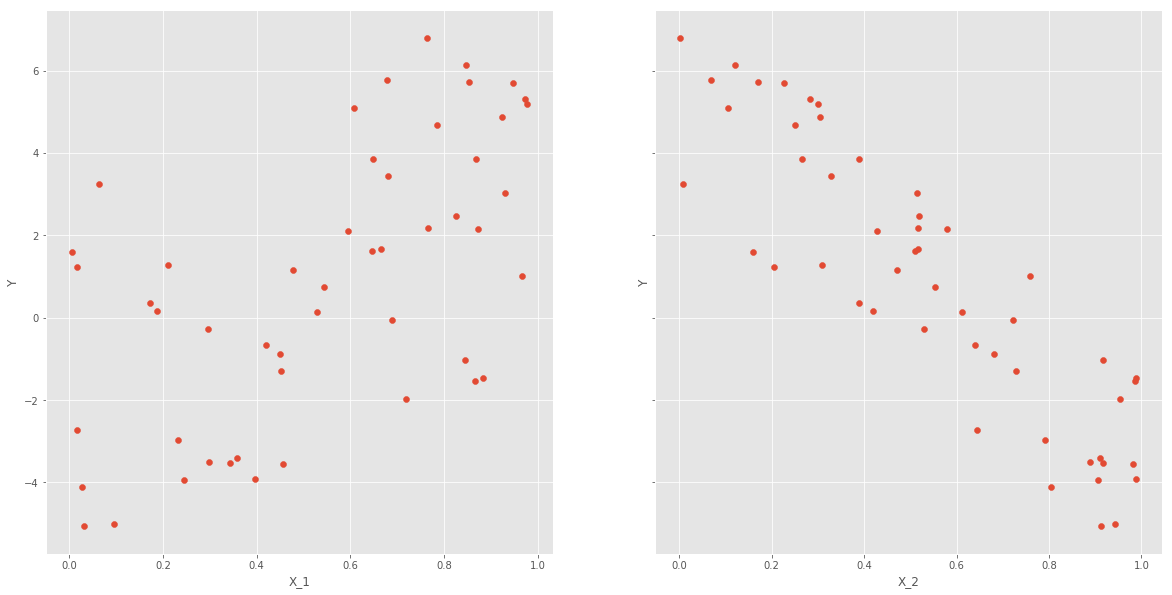

In [6]:
#Lets plot both graphs, to do that we need to import matplotlib and use ggplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#We will use subplots to make two scatter plots side by side for both independent variables
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

#Plot X_1
ax1.scatter(X_n[:,0], Y_n)

#Plot X_2
ax2.scatter(X_n[:,1], Y_n)

#Set Lavels
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax2.set_xlabel('X_2')
ax2.set_ylabel('Y')

#Lets see
plt.show()

#### But enough with all these definitions, lets have some fun and play with what we learned using Scikit-Learn 

In [9]:
#Lets start by importing the linear_model from sklearn
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [13]:
#Lets fit our model to see what betas it gives us
ols.fit(X_n, Y_n)

#Getting our betas, now since we didnt give any variance to our Y values we should get exactly (5,-9)
print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))

#Getting our Y intercept aka beta_0, also no variance so it should be exactly 3
print("beta_0: " + str(np.round(ols.intercept_, 3)))

#Lets get out RSS, this should be 0 since there are no errors 
print("RSS: %.2f" % np.sum((ols.predict(X_n) - Y_n) ** 2))

#Our R^2 should be a perfect fit of 1.0 lets see
print("R^2: %.5f" % ols.score(X_n, Y_n))

beta_1, beta_2: [ 5. -9.]
beta_0: 3.0
RSS: 0.00
R^2: 1.00000
